<a href="https://colab.research.google.com/github/AnishaA-git/zoomApi/blob/master/weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

%matplotlib inline

In [12]:
data = pd.read_csv('/minute_weather.csv')


In [13]:
data.shape


(1587257, 13)

In [14]:
data.head()


,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [15]:
sampled_df = data[(data['rowID'] % 10) == 0]
sampled_df.shape

(158726, 13)

In [16]:
sampled_df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
rowID,158726.0,793625.000000,458203.937509,0.00,396812.5,793625.00,1190437.50,1587250.00
air_pressure,158726.0,916.830161,3.051717,905.00,914.8,916.70,918.70,929.50
air_temp,158726.0,61.851589,11.833569,31.64,52.7,62.24,70.88,99.50
avg_wind_direction,158680.0,162.156100,95.278201,0.00,62.0,182.00,217.00,359.00
avg_wind_speed,158680.0,2.775215,2.057624,0.00,1.3,2.20,3.80,31.90
max_wind_direction,158680.0,163.462144,92.452139,0.00,68.0,187.00,223.00,359.00
max_wind_speed,158680.0,3.400558,2.418802,0.10,1.6,2.70,4.60,36.00
min_wind_direction,158680.0,166.774017,97.441109,0.00,76.0,180.00,212.00,359.00
min_wind_speed,158680.0,2.134664,1.742113,0.00,0.8,1.60,3.00,31.60
rain_accumulation,158725.0,0.000318,0.011236,0.00,0.0,0.00,0.00,3.12


In [17]:
sampled_df[sampled_df['rain_accumulation'] == 0].shape


(157812, 13)

In [18]:
sampled_df[sampled_df['rain_duration'] == 0].shape


(157237, 13)

In [19]:
del sampled_df['rain_accumulation']
del sampled_df['rain_duration']

In [20]:
rows_before = sampled_df.shape[0]
sampled_df = sampled_df.dropna()
rows_after = sampled_df.shape[0]

In [21]:
rows_before - rows_after


46

In [22]:
sampled_df.columns


Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')

In [23]:
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
        'max_wind_speed','relative_humidity']

In [24]:
select_df = sampled_df[features]


In [25]:
select_df.columns


Index(['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
       'max_wind_direction', 'max_wind_speed', 'relative_humidity'],
      dtype='object')

In [26]:
select_df


,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity
0,912.3,64.76,97.0,1.2,106.0,1.6,60.5
10,912.3,62.24,144.0,1.2,167.0,1.8,38.5
20,912.2,63.32,100.0,2.0,122.0,2.5,58.3
30,912.2,62.60,91.0,2.0,103.0,2.4,57.9
40,912.2,64.04,81.0,2.6,88.0,2.9,57.4
...,...,...,...,...,...,...,...
1587210,915.9,75.56,330.0,1.0,341.0,1.3,47.8
1587220,915.9,75.56,330.0,1.1,341.0,1.4,48.0
1587230,915.9,75.56,344.0,1.4,352.0,1.7,48.0
1587240,915.9,75.20,359.0,1.3,9.0,1.6,46.3


In [27]:
X = StandardScaler().fit_transform(select_df)
X

array([[-1.48456281,  0.24544455, -0.68385323, ..., -0.62153592,
        -0.74440309,  0.49233835],
       [-1.48456281,  0.03247142, -0.19055941, ...,  0.03826701,
        -0.66171726, -0.34710804],
       [-1.51733167,  0.12374562, -0.65236639, ..., -0.44847286,
        -0.37231683,  0.40839371],
       ...,
       [-0.30488381,  1.15818654,  1.90856325, ...,  2.0393087 ,
        -0.70306017,  0.01538018],
       [-0.30488381,  1.12776181,  2.06599745, ..., -1.67073075,
        -0.74440309, -0.04948614],
       [-0.30488381,  1.09733708, -1.63895404, ..., -1.55174989,
        -0.62037434, -0.05711747]])

model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)
model
 KMeans(a

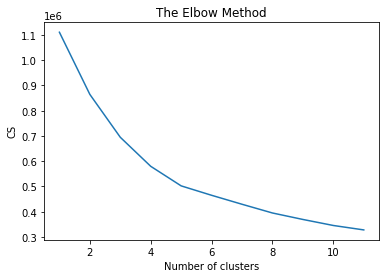

In [34]:
cs = []
for i in range(1, 12):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  model = kmeans.fit(X)
  print("model\n", model)
  cs.append(kmeans.inertia_)
plt.plot(range(1, 12), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()


In [35]:
centers = model.cluster_centers_
centers

array([[ 0.0234134 , -0.76991978, -1.18721172, -0.57042467, -1.03265529,
        -0.58479195,  0.87599943],
       [-0.17664576,  0.61201011,  0.40637287,  0.66559324,  0.51568027,
         0.60754678, -0.1767379 ],
       [ 1.39348262, -0.09251804, -1.11833876, -0.12022328, -0.97734261,
        -0.10214831, -0.97635187],
       [ 0.32756751, -0.96313908,  0.65724118, -0.54499525,  0.85161631,
        -0.52717313,  1.09386743],
       [-1.14935775, -0.8779012 ,  0.44289205,  1.94305628,  0.53565994,
         1.90238872,  0.91752414],
       [ 0.2354262 ,  0.32027699,  1.88756409, -0.65212126, -1.55131527,
        -0.57693929, -0.28385676],
       [-0.17841943,  0.86297697, -1.30941218, -0.5789595 , -1.16709987,
        -0.59446643, -0.6347695 ],
       [-0.24096244,  0.60021502,  0.19421734, -0.63145992,  0.36949225,
        -0.64535938, -0.39271749],
       [ 1.18903499, -0.25093286, -1.15410938,  2.091176  , -1.05223522,
         2.20726852, -1.1316955 ],
       [-0.88034573, -1.1506

In [36]:
# Function that creates a DataFrame with a column for Cluster Number

def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [37]:
# Function that creates Parallel Plots

def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')


In [38]:
P = pd_centers(features, centers)
P


,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,prediction
0,0.023413,-0.769920,-1.187212,-0.570425,-1.032655,-0.584792,0.875999,0
1,-0.176646,0.612010,0.406373,0.665593,0.515680,0.607547,-0.176738,1
2,1.393483,-0.092518,-1.118339,-0.120223,-0.977343,-0.102148,-0.976352,2
3,0.327568,-0.963139,0.657241,-0.544995,0.851616,-0.527173,1.093867,3
4,-1.149358,-0.877901,0.442892,1.943056,0.535660,1.902389,0.917524,4
5,0.235426,0.320277,1.887564,-0.652121,-1.551315,-0.576939,-0.283857,5
6,-0.178419,0.862977,-1.309412,-0.578959,-1.167100,-0.594466,-0.634769,6
7,-0.240962,0.600215,0.194217,-0.631460,0.369492,-0.645359,-0.392717,7
8,1.189035,-0.250933,-1.154109,2.091176,-1.052235,2.207269,-1.131696,8
9,-0.880346,-1.150647,0.372221,0.259519,0.473217,0.248672,1.342677,9


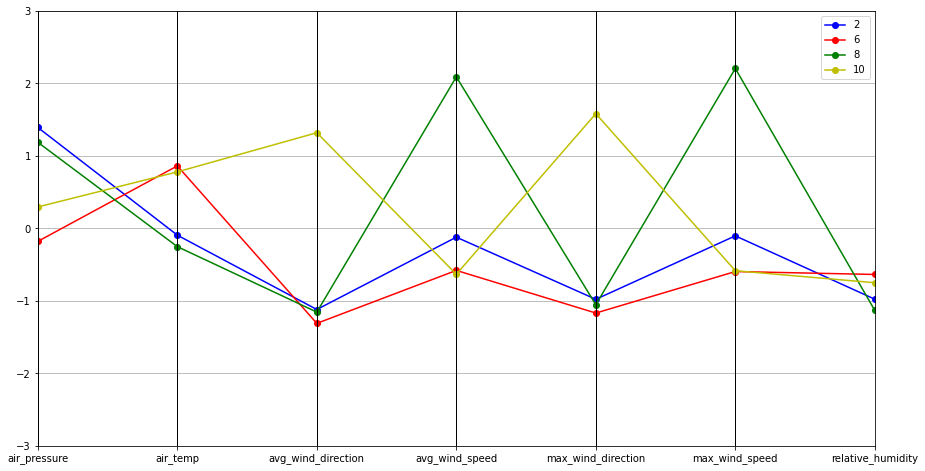

In [39]:
parallel_plot(P[P['relative_humidity'] < -0.5])


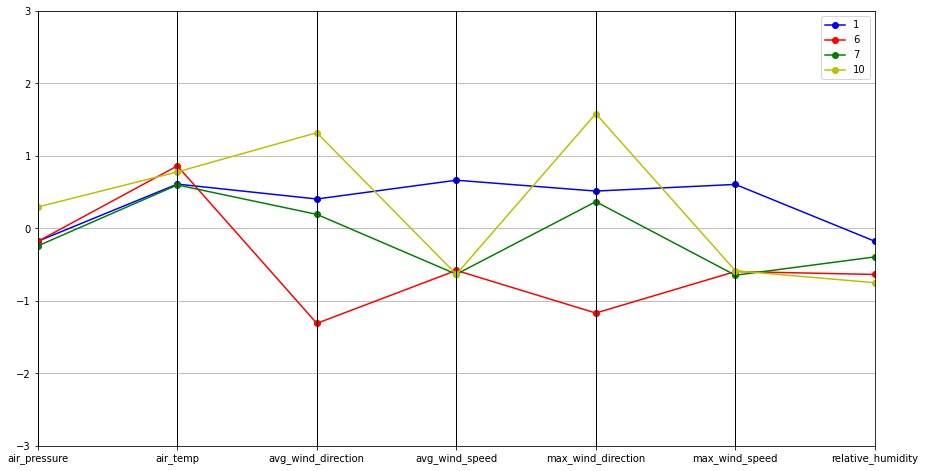

In [40]:
parallel_plot(P[P['air_temp'] > 0.5])


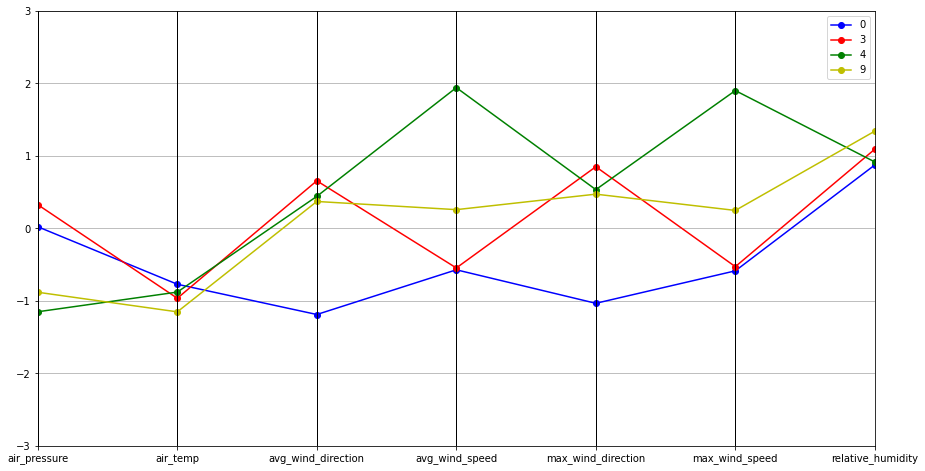

In [41]:
parallel_plot(P[(P['relative_humidity'] > 0.5) & (P['air_temp'] < 0.5)])
